In [40]:
import matplotlib.pyplot as plt
from urllib import request
reqUEM = request.urlopen("http://api.worldbank.org/countries/fin/indicators/SL.UEM.TOTL.ZS?page=1")
reqUEM2 = request.urlopen("http://api.worldbank.org/countries/fin/indicators/SL.UEM.TOTL.ZS?page=2")
dataUEM = reqUEM.read()
dataUEM2 = reqUEM2.read()

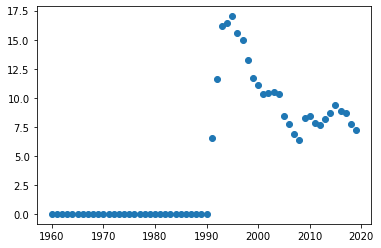

In [17]:
import xml.etree.ElementTree as ET
from io import BytesIO
rootUEM = ET.parse(BytesIO(dataUEM)).getroot()
datesUEM = []
valsUEM = []
for child in rootUEM:
    dateEl = child.find("{http://www.worldbank.org}date")
    valEl = child.find("{http://www.worldbank.org}value")
    try:
        datesUEM.append(int(dateEl.text))
    except:
        datesUEM.append(0)
    try:
        valsUEM.append(float(valEl.text))
    except:
        valsUEM.append(0)
        
rootUEM2 = ET.parse(BytesIO(dataUEM2)).getroot()
for child in rootUEM2:
    dateEl = child.find("{http://www.worldbank.org}date")
    valEl = child.find("{http://www.worldbank.org}value")
    try:
        datesUEM.append(int(dateEl.text))
    except:
        datesUEM.append(0)
    try:
        valsUEM.append(float(valEl.text))
    except:
        valsUEM.append(0)
        
plt.scatter(datesUEM, valsUEM)

In [18]:
reqGDP = request.urlopen("http://api.worldbank.org/countries/fin/indicators/NY.GDP.MKTP.CN?page=1")
reqGDP2 = request.urlopen("http://api.worldbank.org/countries/fin/indicators/NY.GDP.MKTP.CN?page=2")
dataGDP = reqGDP.read()
dataGDP2 = reqGDP2.read()

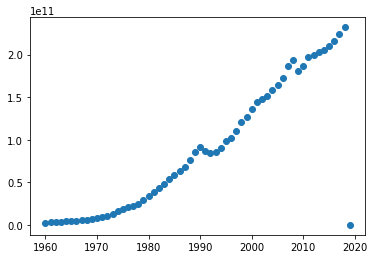

In [19]:
rootGDP = ET.parse(BytesIO(dataGDP)).getroot()
datesGDP = []
valsGDP = []
for child in rootGDP:
    dateEl = child.find("{http://www.worldbank.org}date")
    valEl = child.find("{http://www.worldbank.org}value")
    try:
        datesGDP.append(int(dateEl.text))
    except:
        datesGDP.append(0)
    try:
        valsGDP.append(float(valEl.text))
    except:
        valsGDP.append(0)
        
rootGDP2 = ET.parse(BytesIO(dataGDP2)).getroot()
for child in rootGDP2:
    dateEl = child.find("{http://www.worldbank.org}date")
    valEl = child.find("{http://www.worldbank.org}value")
    try:
        datesGDP.append(int(dateEl.text))
    except:
        datesGDP.append(0)
    try:
        valsGDP.append(float(valEl.text))
    except:
        valsGDP.append(0)
        
plt.scatter(datesGDP, valsGDP)

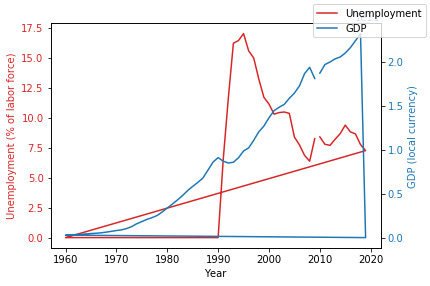

In [43]:
import numpy as np
uem = np.column_stack((datesUEM, valsUEM))
gdp = np.column_stack((datesGDP, valsGDP))
years = datesUEM

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment (% of labor force)', color=color)
ax1.plot(years, valsUEM, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('GDP (local currency)', color=color)  # we already handled the x-label with ax1
ax2.plot(years, valsGDP, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.legend(['Unemployment', 'GDP'])

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("unemployment_vs_gdp.pdf")
plt.show()